In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binomtest

In [41]:
# Cargaremos el archivo Excel modificado que el usuario acaba de subir
file_path_excel_modificado = 'dataset_empleados.xlsx'

In [42]:
# Utilizamos Pandas para cargar el archivo Excel modificado
df_empleados_excel_modificado = pd.read_excel(file_path_excel_modificado)

In [43]:
#Intervalo de confianza 1
# Extraemos la columna de horas de trabajo del DataFrame modificado
horas_trabajo_modificado = df_empleados_excel_modificado['Horas_Trabajo']

# Calculamos la media y la desviación estándar de las horas de trabajo
media_horas_modificado = np.mean(horas_trabajo_modificado)
std_horas_modificado = np.std(horas_trabajo_modificado, ddof=1)  # ddof=1 para muestra

# Número de observaciones
n_modificado = len(horas_trabajo_modificado)

# Calculamos el intervalo de confianza del 95% para la media
confianza = 0.95
sem_modificado = std_horas_modificado / np.sqrt(n_modificado)
intervalo_confianza_modificado = stats.norm.interval(confianza, loc=media_horas_modificado, scale=sem_modificado)

print("intervalo de confianza sobre las horas de trabajo",intervalo_confianza_modificado)
print("media muestral", media_horas_modificado)
print("std", std_horas_modificado)
print("n", n_modificado)
print("sem", sem_modificado)

intervalo de confianza sobre las horas de trabajo (42.57585990251015, 44.64862989340822)
media muestral 43.61224489795919
std 3.7014429986302426
n 49
sem 0.5287775712328918


In [44]:
# Asumiendo que 'df_empleados_excel_modificado' ya ha sido definido y contiene los datos filtrados
media_salario_licenciados = np.mean(df_empleados_excel_modificado['Salario'])
std_salario_licenciados = np.std(df_empleados_excel_modificado['Salario'], ddof=1)
n_licenciados = len(df_empleados_excel_modificado)

confianza = 0.95
sem_licenciados = std_salario_licenciados / np.sqrt(n_licenciados)

# Usando 't.interval'
intervalo_confianza_licenciados = stats.t.interval(confianza, df=n_licenciados-1, loc=media_salario_licenciados, scale=sem_licenciados)

print("Intervalo de confianza del 95% para el salario medio de los licenciados:", intervalo_confianza_licenciados)
print("media", media_salario_licenciados)
print("std", std_salario_licenciados)
print("n", n_licenciados)


Intervalo de confianza del 95% para el salario medio de los licenciados: (70786.18193655624, 77948.51194099477)
media 74367.3469387755
std 12467.781608261052
n 49


In [45]:
# Datos proporcionados
media_muestral = 63545.45  # Media de la muestra
desviacion_estandar = 5820.54  # Desviación estándar de la muestra
tamaño_muestra = 22  # Tamaño de la muestra
confianza = 0.95  # Nivel de confianza deseado

# Calcular el error estándar de la media
error_estandar = desviacion_estandar / (tamaño_muestra ** 0.5)

# Encontrar el valor crítico de t
grados_libertad = tamaño_muestra - 1
t_critico = stats.t.ppf((1 + confianza) / 2, grados_libertad)

# Calcular el intervalo de confianza
margen_error = t_critico * error_estandar
ci_lower = media_muestral - margen_error
ci_upper = media_muestral + margen_error

ci_lower, ci_upper
print("lower", ci_lower)
print("upper",ci_upper)
print("media", media_muestral)
print("std", desviacion_estandar)
print("n", tamaño_muestra)

lower 60964.76713783794
upper 66126.13286216205
media 63545.45
std 5820.54
n 22


In [46]:
# Contar el número de mujeres en la muestra
num_mujeres = df_empleados_excel_modificado['Genero'].str.strip().str.lower().value_counts().get('femenino', 0)
total_empleados = len(df_empleados_excel_modificado)

# Proporción observada de mujeres en la muestra
proporcion_mujeres = num_mujeres / total_empleados

# Nueva hipótesis nula
p_h0_nueva = 0.32

# Realizar el test de hipótesis con la nueva hipótesis nula
# Usando 'greater' como alternativa porque H1: p > 0.19
# Realizar el test de hipótesis con la nueva hipótesis nula usando 'binomtest'
resultado_test = binomtest(num_mujeres, total_empleados, p_h0_nueva, alternative='greater')

# Obtener el valor p del resultado
p_value_nueva = resultado_test.pvalue

# Imprimir los resultados
print("Numero de mujeres en la muestra:", num_mujeres)
print("Total de empleados en la muestra:", total_empleados)
print("Proporcion observada de mujeres:", proporcion_mujeres)
print("Valor p del test de hipotesis:", p_value_nueva)

Numero de mujeres en la muestra: 23
Total de empleados en la muestra: 49
Proporcion observada de mujeres: 0.46938775510204084
Valor p del test de hipotesis: 0.020543795543531772


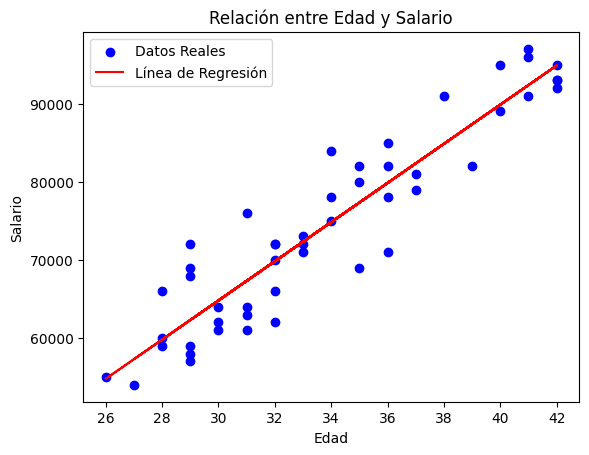

In [47]:
# Preparación de los datos para el modelo de regresión lineal
X = df_empleados_excel_modificado['Edad']  # Variable independiente
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtenemos los valores de la edad y los salarios predichos por el modelo
X_valores = df_empleados_excel_modificado['Edad']
y_pred = modelo.predict()

# Gráfico de dispersión de los datos reales
plt.scatter(X_valores, y, label='Datos Reales', color='blue')

# Línea de tendencia del modelo de regresión
plt.plot(X_valores, y_pred, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()

Coeficiente de correlación de Pearson entre Edad y Salario: 0.930705317724075
Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: 0.9659206584056843


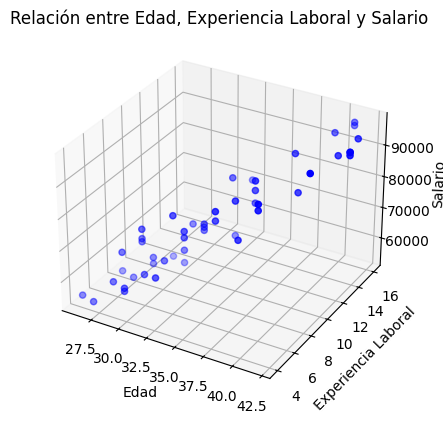

In [48]:
# MODELO REGRESION LINEAL MULTIPLE EDAD, EXPERIENCIA LABORAL / SALARIO 

# Calcular las correlaciones lineales
correlacion_edad_salario = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])
correlacion_experiencia_salario = df_empleados_excel_modificado['Experiencia_Laboral'].corr(df_empleados_excel_modificado['Salario'])

print(f"Coeficiente de correlación de Pearson entre Edad y Salario: {correlacion_edad_salario}")
print(f"Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: {correlacion_experiencia_salario}")

# Gráfico de dispersión 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos para el gráfico
x = df_empleados_excel_modificado['Edad']
y = df_empleados_excel_modificado['Experiencia_Laboral']
z = df_empleados_excel_modificado['Salario']

# Crear el gráfico de dispersión
ax.scatter(x, y, z, color='b')

# Etiquetas y título
ax.set_xlabel('Edad')
ax.set_ylabel('Experiencia Laboral')
ax.set_zlabel('Salario')
ax.set_title('Relación entre Edad, Experiencia Laboral y Salario')

# Mostrar el gráfico
plt.show()